<a href="https://colab.research.google.com/github/ooootaaaa/DeepLearning2022Late/blob/main/1115%5BCNN%2BTrain_example2022%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN(畳み込みを含むニューラルネットワーク)でモデルに学習させる(=訓練)

##学習モデルのライブラリをimport

In [1]:
from keras.models import Sequential, Model
from keras.layers import Conv2D
from keras.layers import Flatten 
from keras.layers import Dense

##keras自身もimport

In [2]:
import keras

##SVG画像表示用のライブラリをimport

In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


##その他のライブラリをimport

In [4]:
#乱数を作るためにNumpyをimport
import numpy as np #importして、npという別名を設定
#早期終了(Earl Stopping)のためのライブラリをimport
import keras.callbacks as callbacks #callbacksという別名を設定

##Numpyで乱数をつくり、ダミーデータとしって学習用、検証用にする

In [5]:
#学習用データをx_trainとして作る
x_train = np.random.random((100,6,6,1))
#学習用データの正解をy_trainとして作る
y_train = keras.utils.to_categorical(np.random.randint(10,size=(100,1)),
                                                       num_classes=10)

In [6]:
#テスト検証用データをx_trainとして作る
x_test = np.random.random((20,6,6,1))#(6,6,1)の形を今度は20セット分
#テスト検証用データの正解をy_testとして作る
y_test = keras.utils.to_categorical(np.random.randint(10,size=(20,1)),
                                    num_classes=10
    
                                   )

#学習モデルを生成する

In [7]:
model = Sequential()

#学習モデルにニューロンの層を追加してニューラルネットワークにする

#畳み込み層を追加

In [8]:
model.add(Conv2D(filters = 3, #3つのフィルター
    kernel_size = (3,3),#受容野縦3横3
    kernel_initializer='lecun_uniform',
    input_shape=(6,6,1),#入力データの形縦6,横6
    padding='same', #ゼロパディング
    name=('Conv2D_1')
))

##そのほかの層も追加する

In [9]:
#全結合層
model.add(Flatten(name='Flatten_1'))
#softmaxで分類するニューロン層
model.add(Dense(units=10,activation='softmax',name='Dense_1'))

##組み立てた学習モデルの構成をSVG画像として表示

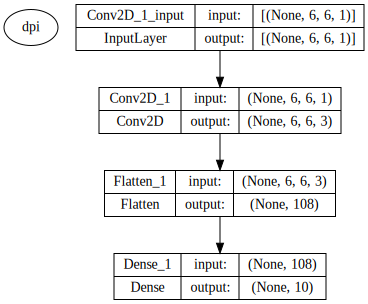

In [10]:
SVG(model_to_dot(model,
                 show_shapes=True,dpi=None
                 ).create(prog='dot',format='svg'))

##組み立てたモデルを学習データで訓練する
###早期終了も設定する

In [11]:
#早期終了用の設定のオブジェクトを用意する
earlyStopping = callbacks.EarlyStopping(monitor='val_loss',#損失を監視
                                        patience=5)#epoch5つ分様子を見る

###学習方法を指定して学習モデルをコンパイルする

In [12]:
model.compile(loss='mean_squared_error', #損失を平均(mean)二乗(Suqared)誤差(error)
              optimizer='sgd' # パラメータの重みをSGDで最適化する
              # SGD = 確率的勾配降下法
              )

###学習方法を指定した学習モデルを訓練する

In [13]:
model.fit(x_train, y_train, # 学習データと答えデータ
          batch_size=32, # 32個ずつまとめて学習(=バッチ学習)してから重みを調整する
          epochs=10, # バッチが終わったら重みを調整して学習しなおす、その回数
          callbacks=[earlyStopping], # エポックの中で呼ぶcallback処理のリストに早期終了を追加
          validation_split=0.2  #学習データのうち2割を、学習中の自己評価検証に使う
          )

Epoch 1/10
3/3 [==============================] - 1s 176ms/step - loss: 0.0937 - val_loss: 0.0945
Epoch 2/10
3/3 [==============================] - 0s 63ms/step - loss: 0.0937 - val_loss: 0.0945
Epoch 3/10
3/3 [==============================] - 0s 28ms/step - loss: 0.0936 - val_loss: 0.0945
Epoch 4/10
3/3 [==============================] - 0s 26ms/step - loss: 0.0936 - val_loss: 0.0945
Epoch 5/10
3/3 [==============================] - 0s 28ms/step - loss: 0.0936 - val_loss: 0.0945
Epoch 6/10
3/3 [==============================] - 0s 26ms/step - loss: 0.0936 - val_loss: 0.0944
Epoch 7/10
3/3 [==============================] - 0s 28ms/step - loss: 0.0935 - val_loss: 0.0944
Epoch 8/10
3/3 [==============================] - 0s 27ms/step - loss: 0.0935 - val_loss: 0.0944
Epoch 9/10
3/3 [==============================] - 0s 48ms/step - loss: 0.0935 - val_loss: 0.0944
Epoch 10/10
3/3 [==============================] - 0s 51ms/step - loss: 0.0935 - val_loss: 0.0944
